In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [17]:
class SimpleRNN:
    # h_t = tanh(W_hh @ h_{t-1} + W_xh @ x_t + b_h)
    def __init__(self, input_dim : int, hidden_dim: int):
        self.W_hh = np.random.randn(hidden_dim, hidden_dim)
        self.W_xh = np.random.randn(hidden_dim, input_dim)
        self.b_h = np.zeros((hidden_dim, 1))
        self.hidden_dim = hidden_dim

    def forward(self, x, h_prev):
        return np.tanh(self.W_hh @ h_prev + self.W_xh @ x + self.b_h)

    def forward_sequence(self, xs):
        h = np.zeros((self.hidden_dim,1))
        hs = []
        for t, x in enumerate(xs):
            h = self.forward(x, h)
            hs.append(h)
            print(f" t= {t}: ||h|| = {np.linalg.norm(h):.4f}, min = {h.min():.3f}, max = {h.max():.3f}")
        return hs

In [18]:
rnn = SimpleRNN(input_dim = 10, hidden_dim=20)
sequence = [np.random.randn(10, 1) for _ in range(5)]

In [19]:
hidden_state = rnn.forward_sequence(sequence)

 t= 0: ||h|| = 4.1483, min = -1.000, max = 1.000
 t= 1: ||h|| = 3.7021, min = -1.000, max = 1.000
 t= 2: ||h|| = 3.9210, min = -1.000, max = 1.000
 t= 3: ||h|| = 4.0624, min = -1.000, max = 1.000
 t= 4: ||h|| = 3.8971, min = -1.000, max = 1.000


In [20]:
hidden_state[1].shape

(20, 1)

In [21]:
rnn_viz = SimpleRNN(input_dim=5, hidden_dim=8)
long_seq = [np.random.randn(5, 1) for _ in range(20)]

In [22]:
h = np.zeros((8, 1))
all_h = []
for x in long_seq:
    h = rnn_viz.forward(x, h)
    all_h.append(h.flatten())
all_h = np.array(all_h)

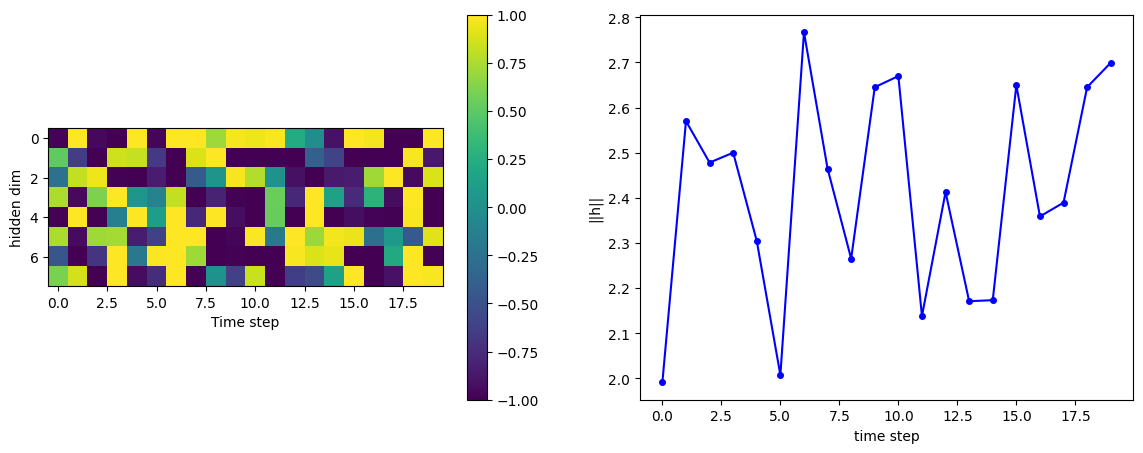

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

im = axes[0].imshow(all_h.T, vmin=-1, vmax=1)
axes[0].set_xlabel('Time step')
axes[0].set_ylabel('hidden dim')
plt.colorbar(im, ax=axes[0])

norms = [np.linalg.norm(h) for h in all_h]
axes[1].plot(norms, 'b-o', markersize=4)
axes[1].set_xlabel('time step')
axes[1].set_ylabel('||h||')

plt.show()